#### Ensemble model with (K-NN/ Xgboost / Stacked LSTM(deep learning)) 

In [1]:
import pandas as pd 
import numpy as np
import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from keras.utils import np_utils
import os
import pickle
from torch.autograd import Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score 
from sklearn.metrics import classification_report

seed = 7
np.random.seed(seed)

c:\Users\hankk\Miniconda3\envs\py38\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pred_results_path = '../2-1.HAR_model/pred_results/'
file_path = '../Data/'

In [3]:
with open(file_path + 'data_no_std.pkl', 'rb') as f:
     dataset = pickle.load(f)

train_X = dataset[0]
test_X = dataset[1]
train_y = dataset[2]
test_y = dataset[3]

In [4]:
knn = pd.read_csv(pred_results_path + 'knn_results.csv', index_col = 0)
xgb = pd.read_csv(pred_results_path + 'xgb_results.csv', index_col = 0)
lstm = pd.read_csv(pred_results_path + 'lstm_results.csv', index_col = 0)
cnn = pd.read_csv(pred_results_path + 'cnn_results.csv', index_col = 0)
cnn_lstm = pd.read_csv(pred_results_path + 'cnn_lstm_results.csv', index_col = 0)

In [5]:
# encode the classification labels
knn = np_utils.to_categorical(knn)
xgb = np_utils.to_categorical(xgb)
lstm = np_utils.to_categorical(lstm)
cnn = np_utils.to_categorical(cnn)
cnn_lstm = np_utils.to_categorical(cnn_lstm)

In [6]:
w1 = 0.25
w2 = 0.4
w3 = 0.35
w4 = 0.2
w5 = 0.35

In [7]:
pred = w1*lstm + w2*cnn + w3*cnn_lstm + w4*knn + w5*xgb
pred

array([[1.35     , 0.       , 0.       , 0.       , 0.2      ],
       [1.35     , 0.       , 0.       , 0.       , 0.2      ],
       [1.35     , 0.       , 0.       , 0.2      , 0.       ],
       ...,
       [1.5500001, 0.       , 0.       , 0.       , 0.       ],
       [1.35     , 0.       , 0.       , 0.2      , 0.       ],
       [0.35     , 0.       , 0.2      , 1.       , 0.       ]],
      dtype=float32)

In [8]:
pred = np.argmax(pred, axis=1).reshape(-1,1)
test_y = test_y.reshape(-1,1)

accuracy:0.9518486672398968
Precision: 0.880825
Recall: 0.735389
F1 score: 0.793455


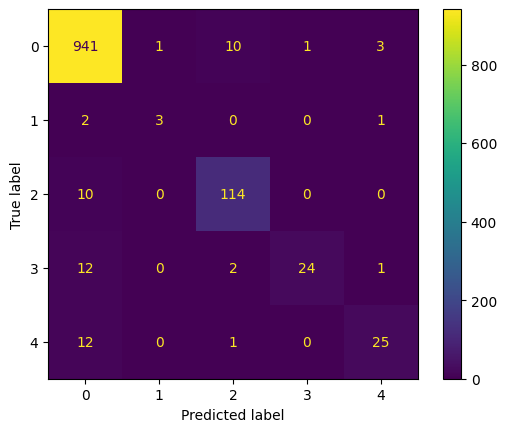

In [9]:
## model evaluation by test set 
oos_y = []
oos_pred = []

test_y
oos_y.append(test_y)
oos_pred.append(pred)
y_compare = test_y

score = accuracy_score(y_compare, pred)
print("accuracy:{}".format(score))
precision = precision_score(y_compare, pred, average='macro')
print('Precision: %f' % precision)
recall = recall_score(y_compare, pred, average='macro')
print('Recall: %f' % recall)
f1 = f1_score(y_compare, pred, average='macro')
print('F1 score: %f' % f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_compare, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [10]:
print(classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       956
           1       0.75      0.50      0.60         6
           2       0.90      0.92      0.91       124
           3       0.96      0.62      0.75        39
           4       0.83      0.66      0.74        38

    accuracy                           0.95      1163
   macro avg       0.88      0.74      0.79      1163
weighted avg       0.95      0.95      0.95      1163



- lstm/cnn/cnn_lstm : 0.25/0.4/0.35 -> precision recall F1 0.9 0.72 0.78
- lstm/cnn/cnn_lstm/knn/xgb : 0.25/0.4/0.35/0.2/0.35 -> precision recall F1 0.92 0.71 0.78